<img src="../images/Logo_de_Enron.svg"/>

> Enron Corporation was an American energy, commodities, and services company based in Houston, Texas. It was founded in 1985 as a merger between Houston Natural Gas and InterNorth, both relatively small regional companies. Before its bankruptcy on December 3, 2001, Enron employed approximately 29,000 staff and was a major electricity, natural gas, communications and pulp and paper company, with claimed revenues of nearly
\$101 billion during 2000. Fortune named Enron "America's Most Innovative Company" for six consecutive years.
>
> — <cite><a href="https://en.wikipedia.org/wiki/Enron"> Wikipedia </a></cite>

Let's watch enron email dataset which became public domain after Enron bankruptcy.

You can download the dataset from <a href="https://www.cs.cmu.edu/~./enron/">this place</a>.

## Loading data and draft data preparing

In [1]:
import warnings
import pandas as pd
from utils import make_dataset
warnings.filterwarnings("ignore")

data = make_dataset()

100%|██████████| 30109/30109 [00:02<00:00, 12782.82it/s]


In [2]:
data.head()

,date,subject,from,to,text
11433,1999-12-10 05:05:00,Tetco 7c's,chris.germany@enron.com,judy.townsend@enron.com,I have updated the Tetco 7c usage tickets to i...
11432,1999-12-10 05:05:00,Tetco 7c's,chris.germany@enron.com,brenda.fletcher@enron.com,I have updated the Tetco 7c usage tickets to i...
18894,1999-12-10 05:12:00,New EPRM Speakers,vince.kaminski@enron.com,stinson.gibner@enron.com,"Stinson,\n\nThis is the request I got from RIS..."
18893,1999-12-10 05:13:00,Re: New EPRM Speakers,vince.kaminski@enron.com,helen@risk.co.uk,"Helen,\n\nI forwarded your message to my assoc..."
304,1999-12-10 07:00:00,,phillip.allen@enron.com,naomi.johnston@enron.com,"Naomi,\n\nThe two analysts that I have had con..."


We should tokenize and lemmatize(or stem) text data for unification and better feature engineering.

In [3]:
%%time
import nltk
from bs4 import BeautifulSoup
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import TweetTokenizer

tknzr = TweetTokenizer()
lm = WordNetLemmatizer()

data['text'] = data['text'].apply(lambda x: tknzr.tokenize(x))
data['subject'] = data['subject'].apply(lambda x: tknzr.tokenize(x))

data['text'] = data['text'].apply(lambda x: 
    BeautifulSoup(
        ' '.join([lm.lemmatize(token).lower() for token in x])
    ).text
)
data['subject'] = data['subject'].apply(lambda x: 
    BeautifulSoup(
        ' '.join([lm.lemmatize(token).lower() for token in x])
    ).text
)

CPU times: user 1min 12s, sys: 1.07 s, total: 1min 13s
Wall time: 1min 12s


In [4]:
data.head()

,date,subject,from,to,text
11433,1999-12-10 05:05:00,tetco 7c ' s,chris.germany@enron.com,judy.townsend@enron.com,i have updated the tetco 7c usage ticket to in...
11432,1999-12-10 05:05:00,tetco 7c ' s,chris.germany@enron.com,brenda.fletcher@enron.com,i have updated the tetco 7c usage ticket to in...
18894,1999-12-10 05:12:00,new eprm speakers,vince.kaminski@enron.com,stinson.gibner@enron.com,"stinson , this is the request i got from risk ..."
18893,1999-12-10 05:13:00,re : new eprm speakers,vince.kaminski@enron.com,helen@risk.co.uk,"helen , i forwarded your message to my associa..."
304,1999-12-10 07:00:00,,phillip.allen@enron.com,naomi.johnston@enron.com,"naomi , the two analyst that i have had contac..."


## Sentiments in dataset
Of course, as we know story of this company is accounting fraud story.

Therefore, look on sentiments on email subjects and message bodies.

### Sentiment in subjects

In [5]:
%%time
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

text_sentiment = pd.DataFrame(data['text'].apply(lambda x: analyzer.polarity_scores(x)).tolist())
subject_sentiment = pd.DataFrame(data['subject'].apply(lambda x: analyzer.polarity_scores(x)).tolist())
subject_sentiment.head()

CPU times: user 5min 44s, sys: 79.9 ms, total: 5min 44s
Wall time: 5min 44s


,neg,neu,pos,compound
0,0.0,1.0,0.0,0.0
1,0.0,1.0,0.0,0.0
2,0.0,1.0,0.0,0.0
3,0.0,1.0,0.0,0.0
4,0.0,0.0,0.0,0.0


In [6]:
subject_sentiment['neg'].max(), subject_sentiment['pos'].max()

(1.0, 1.0)

In [7]:
data[subject_sentiment['neg'] == subject_sentiment['neg'].max()][['date', 'subject', 'text']]

,date,subject,text
18619,2000-01-31 00:20:00,re : additional bloomberg terminal for weather...,"jason , there wa a problem with the request . ..."
7730,2000-04-06 01:40:00,re : sitara training,"no , i don't want to ."
2494,2000-09-28 01:09:00,"jackson.logan@enron.com , ami.chokshi@enron.com ,",- - - forwarded by eric bass / hou / ect on 09...
6037,2000-10-02 05:55:00,re : lipa,"guys , assuming that we receive $ 7m for the 6..."
14270,2000-10-11 01:56:00,re : thanks,no
33803,2000-11-28 07:37:00,re : ken lay interview,thanks for the in-depth information on our man...
23757,2000-12-07 14:20:00,speak now ... turbopark consent,here's the turbopark consent . please call me ...
23727,2000-12-08 04:25:00,re : override letter,""" taylor , rob "" on 12/08 / 2000 12:21 : 28 p..."
27097,2000-12-29 03:52:00,re : mhi - 2162 / launching,"thanks , i had not seen it . happy new year . m"
34763,2001-02-13 04:29:00,re : #517891,"no , thank you ! i've changed it to caiso ener..."


In [8]:
data[subject_sentiment['pos'] == subject_sentiment['pos'].max()][['date', 'subject', 'text']]

,date,subject,text
1747,1999-12-14 02:59:00,re : deal 117413,done ! anything else entex man ? - e enron nor...
19582,1999-12-14 07:11:00,re : eol,"sorry , he ha told me that at least 10 time . ..."
9063,2000-01-11 00:42:00,the memo,congratulations to you both ! your designation...
15191,2000-02-09 08:18:00,"michelle.neville@enron.com , angela.barnett@en...",- - - forwarded by judy hernandez / hou / ect ...
10760,2000-03-08 23:54:00,re : cng-kriscott,"angie , this is not anything to worry about ri..."
...,...,...,...
25364,2001-05-14 06:58:00,re : confidentiality agreement,three glitch he probably just changed over to ...
22228,2001-05-31 03:55:00,re : mdea agreement scheduling,please fill in the blank : = 01 & first contin...
4738,2001-06-17 20:41:00,re : question about tw operational capacity,"brian , just wanted to follow up to be sure yo..."
4737,2001-06-17 20:41:00,re : question about tw operational capacity,"brian , just wanted to follow up to be sure yo..."


Yes, as we can see, there were messages with negative subjects about financial troubles.

### Sentiment in messages
Also there are similar picture with message body sentiments.

In [9]:
text_sentiment.head()

,neg,neu,pos,compound
0,0.000,1.000,0.000,0.0000
1,0.000,1.000,0.000,0.0000
2,0.013,0.868,0.119,0.9388
3,0.000,0.851,0.149,0.9593
4,0.013,0.926,0.061,0.6786


In [10]:
text_sentiment['neg'].max(), text_sentiment['pos'].max()

(1.0, 1.0)

In [11]:
data[text_sentiment['neg'] == text_sentiment['neg'].max()][['date', 'subject', 'text']]

,date,subject,text
18866,1999-12-17 07:15:00,re : emission trading,- - - forwarded by vince j kaminski / hou / ec...
9986,2000-06-19 09:49:00,re : map,you de man . could you change the spelling fro...
14546,2001-02-01 01:03:00,"shelia.benke@enron.com , donald.black@enron.com ,",christian asked me to work with dan watkiss to...
9363,2001-02-06 09:41:00,re : gallup station - demand rebate,"i haven't had a chance to study this yet , but..."
6813,2001-02-14 00:59:00,re : ees europe - outsourcing reorganisation,"matthew , sound fine - i will have kay start m..."
21175,2001-03-21 00:05:00,re : november 2000 emw variances v financial l...,where are these being transferred from ? i onl...
26767,2001-04-04 08:15:00,pseg,i hear your deal blew up . what happened ? ckm
26598,2001-04-11 07:16:00,breakout contract,fyi - - - forwarded by kay mann / corp / enron...
35367,2001-05-07 15:57:00,west gas customer offisite - proposed,"dorie , laura ... can i get together with you ..."


In [12]:
data[text_sentiment['pos'] == text_sentiment['pos'].max()][['date', 'subject', 'text']]

,date,subject,text
18870,1999-12-17 07:05:00,a paper of mine,- - - forwarded by vince j kaminski / hou / ec...
18727,2000-01-11 01:56:00,congratulations,"george , congratulations . well deserved . vince"
10770,2000-03-08 05:51:00,re : demand charges,- - - forwarded by chris germany / hou / ect o...
30861,2000-03-16 04:51:00,re : the texas graduate school of business - r...,"dr . harris : sorry for the delay , i have bee..."
5439,2000-04-26 03:28:00,,did you guy need me to make a hotel reservatio...
...,...,...,...
26082,2001-05-01 05:08:00,re :,one comment which wa taken related to the appl...
14977,2001-05-01 15:30:00,re : price quote,you are correct sir ! scott
12486,2001-05-14 19:01:00,re :,- - - forwarded by chris germany / hou / ect o...
31361,2001-06-06 13:02:00,"richard.barry@enron.com , keith.braswell@enron...",this is a new interconnect into the suction si...


## More general text features

The longest letters were made by:

In [80]:
%%time
message_len = data['text'].apply(lambda x: len(tknzr.tokenize(x)))

CPU times: user 28.9 s, sys: 72 ms, total: 29 s
Wall time: 29 s


In [81]:
set(data.loc[message_len.sort_values(ascending=False)[:30].index]['from'].tolist())

{'chris.germany@enron.com',
 'cooper.richey@enron.com',
 'darron.giron@enron.com',
 'eric.bass@enron.com',
 'errol.mclaughlin@enron.com',
 'john.arnold@enron.com',
 'judy.hernandez@enron.com',
 'kay.chapman@enron.com',
 'kim.ward@enron.com',
 'lysa.akin@enron.com',
 'mary.hain@enron.com',
 'susan.scott@enron.com',
 'tracy.geaccone@enron.com',
 'vince.kaminski@enron.com'}

The biggest mean length of letters:

In [82]:
means = pd.DataFrame()
means['from'] = data['from']
means['length'] = message_len

means = means.groupby('from').agg({'length': ['max', 'mean']})
means.sort_values(by=[('length', 'max')], ascending=False, inplace=True)
means.head(30)

length             
                              max         mean
from                                          
lysa.akin@enron.com         38123  1157.769231
cooper.richey@enron.com     36550   582.212963
judy.hernandez@enron.com    17888   843.993392
mary.hain@enron.com          8064   416.182731
eric.bass@enron.com          7570   241.483032
errol.mclaughlin@enron.com   6316   161.000000
darron.giron@enron.com       6260   292.718269
john.arnold@enron.com        5956   196.604734
kay.chapman@enron.com        5216   205.948598
chris.germany@enron.com      5061   195.191530
vince.kaminski@enron.com     4891   297.886395
kim.ward@enron.com           4802   274.415686
susan.scott@enron.com        4724   300.592935
tracy.geaccone@enron.com     4619   298.377193
sandra.brawner@enron.com     4476   209.020979
larry.campbell@enron.com     4022   263.316406
tori.kuykendall@enron.com    3841   196.128079
kevin.ruscitti@enron.com     3811   151.462428
geoff.storey@enron.com       3809   439.307692
hunter.shively@enron.com     3806   219.180000
daren.farmer@enron.com       3766   262.104238
randall.gay@enron.com        3761   252.532407
matt.smith@enron.com         3683   131.588652
david.delainey@enron.com     3547   320.133268
kay.mann@enron.com           3522   243.873231
phillip.allen@enron.com      3508   195.857784
tamara.black@enron.com       3507  3507.000000
mike.mcconnell@enron.com     3506   277.439252
susan.pereira@enron.com      3503   213.354839
kate.symes@enron.com         3188   171.708751

In [83]:
means.sort_values(by=[('length', 'mean')], ascending=False, inplace=True)
means.head(30)

length             
                                max         mean
from                                            
tamara.black@enron.com         3507  3507.000000
lysa.akin@enron.com           38123  1157.769231
judy.hernandez@enron.com      17888   843.993392
jeff.king@enron.com            1045   789.750000
clint.dean@enron.com           2036   665.166667
cooper.richey@enron.com       36550   582.212963
j.harris@enron.com              471   471.000000
geoff.storey@enron.com         3809   439.307692
mary.hain@enron.com            8064   416.182731
james.derrick@enron.com        2364   412.339286
lynn.blair@enron.com           1062   401.137931
drew.fossum@enron.com          2854   365.605048
cathy.phillips@enron.com       1343   360.862745
rod.hayslett@enron.com         1105   360.232558
joannie.williamson@enron.com   1571   358.760870
katherine.brown@enron.com       680   347.214286
david.delainey@enron.com       3547   320.133268
sally.beck@enron.com           2393   307.648495
susan.scott@enron.com          4724   300.592935
tracy.geaccone@enron.com       4619   298.377193
vince.kaminski@enron.com       4891   297.886395
darron.giron@enron.com         6260   292.718269
mike.mcconnell@enron.com       3506   277.439252
sherri.reinartz@enron.com       563   275.266667
kim.ward@enron.com             4802   274.415686
andrea.ring@enron.com          2257   272.271318
michelle.lokay@enron.com       2811   270.826087
scott.neal@enron.com           2735   268.931818
larry.campbell@enron.com       4022   263.316406
daren.farmer@enron.com         3766   262.104238

And let's clean text from puncts.

In [84]:
%%time
message_len = data['text'].apply(lambda x: len([xx for xx in tknzr.tokenize(x) if xx.isalpha()]))

CPU times: user 29.6 s, sys: 48 ms, total: 29.7 s
Wall time: 29.7 s


In [85]:
set(data.loc[message_len.sort_values(ascending=False)[:30].index]['from'].tolist())

{'chris.germany@enron.com',
 'cooper.richey@enron.com',
 'darron.giron@enron.com',
 'eric.bass@enron.com',
 'errol.mclaughlin@enron.com',
 'john.arnold@enron.com',
 'judy.hernandez@enron.com',
 'lysa.akin@enron.com',
 'mike.mcconnell@enron.com',
 'vince.kaminski@enron.com'}

In [86]:
means = pd.DataFrame()
means['from'] = data['from']
means['length'] = message_len

means = means.groupby('from').agg({'length': ['max', 'mean']})
means.sort_values(by=[('length', 'max')], ascending=False, inplace=True)
means.head(30)

length             
                              max         mean
from                                          
lysa.akin@enron.com         25503   703.676923
eric.bass@enron.com          4840   154.313914
john.arnold@enron.com        4762   137.986982
judy.hernandez@enron.com     4079   399.610132
errol.mclaughlin@enron.com   3941   104.941176
darron.giron@enron.com       3920   174.301923
vince.kaminski@enron.com     3907   207.510114
chris.germany@enron.com      3370   132.406333
cooper.richey@enron.com      3037   203.009259
mike.mcconnell@enron.com     3015   209.823598
tracy.geaccone@enron.com     2865   191.750000
kay.chapman@enron.com        2815   133.747664
david.delainey@enron.com     2758   236.108949
kay.mann@enron.com           2739   169.642689
susan.scott@enron.com        2734   215.577796
sandra.brawner@enron.com     2715   120.398601
kate.symes@enron.com         2545   123.470942
matt.smith@enron.com         2301    93.578014
tori.kuykendall@enron.com    2278   117.729064
mary.hain@enron.com          2263   280.028112
drew.fossum@enron.com        2261   263.369710
randall.gay@enron.com        2238   162.861111
kim.ward@enron.com           2094   153.309804
hunter.shively@enron.com     2070   140.713333
larry.campbell@enron.com     2057   167.281250
geoff.storey@enron.com       2035   263.307692
kevin.ruscitti@enron.com     2033   103.040462
tamara.black@enron.com       1925  1925.000000
daren.farmer@enron.com       1922   175.538373
susan.pereira@enron.com      1920   142.612903

In [87]:
means.sort_values(by=[('length', 'mean')], ascending=False, inplace=True)
means.head(30)

length             
                                max         mean
from                                            
tamara.black@enron.com         1925  1925.000000
lysa.akin@enron.com           25503   703.676923
jeff.king@enron.com             847   640.250000
judy.hernandez@enron.com       4079   399.610132
j.harris@enron.com              326   326.000000
clint.dean@enron.com            860   314.166667
james.derrick@enron.com        1688   308.785714
mary.hain@enron.com            2263   280.028112
lynn.blair@enron.com            668   264.327586
drew.fossum@enron.com          2261   263.369710
geoff.storey@enron.com         2035   263.307692
cathy.phillips@enron.com        924   262.333333
joannie.williamson@enron.com   1215   260.304348
katherine.brown@enron.com       536   253.857143
rod.hayslett@enron.com          744   240.906977
david.delainey@enron.com       2758   236.108949
sally.beck@enron.com           1733   230.587469
susan.scott@enron.com          2734   215.577796
mike.mcconnell@enron.com       3015   209.823598
vince.kaminski@enron.com       3907   207.510114
cooper.richey@enron.com        3037   203.009259
sherri.reinartz@enron.com       445   197.733333
tracy.geaccone@enron.com       2865   191.750000
andrea.ring@enron.com          1458   185.961240
scott.neal@enron.com           1861   178.971591
sherri.sera@enron.com           753   175.647059
daren.farmer@enron.com         1922   175.538373
darron.giron@enron.com         3920   174.301923
kay.mann@enron.com             2739   169.642689
larry.campbell@enron.com       2057   167.281250

There we can see some important persons of this story: Vince Kaminski, Kay Mann and John Arnold

## Graph features
This data is about emails and therefore it can be considered as complex network data.

In [18]:
import numpy as np
import nxviz as nv
import networkx as nx
import matplotlib.pyplot as plt
%matplotlib inline

np.random.seed(999)

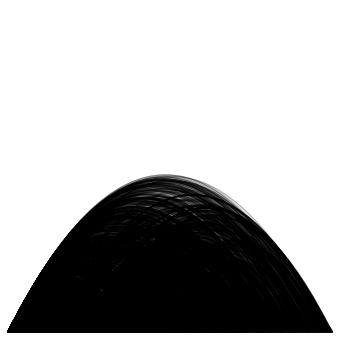

In [19]:
G = nx.from_pandas_edgelist(
    data, 
    'from', 
    'to', 
    edge_attr=['date', 'subject']
)
plot = nv.ArcPlot(G)
plot.draw();

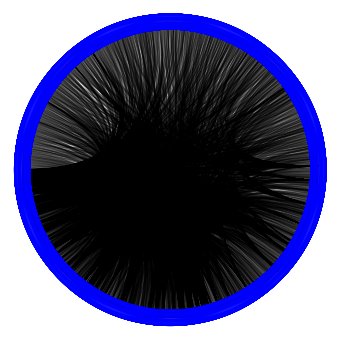

In [20]:
plot = nv.CircosPlot(G)
plot.draw();

Our complex network looks like "hairy ball" that is why we try to see on data just by centrality measures.

In [29]:
import seaborn as sns

def plot_top(cent, centrality_s="Closeness"):
    plt.figure(figsize=(10, 25))
    _ = sns.barplot(x='centrality', y='name', data=cent[:30], orient='h')
    _ = plt.xlabel(f'{centrality_s} Centrality')
    _ = plt.ylabel('Correspondent')
    _ = plt.title(f'Top 30 {centrality_s} Centrality Scores in Enron Email Network')
    plt.show()

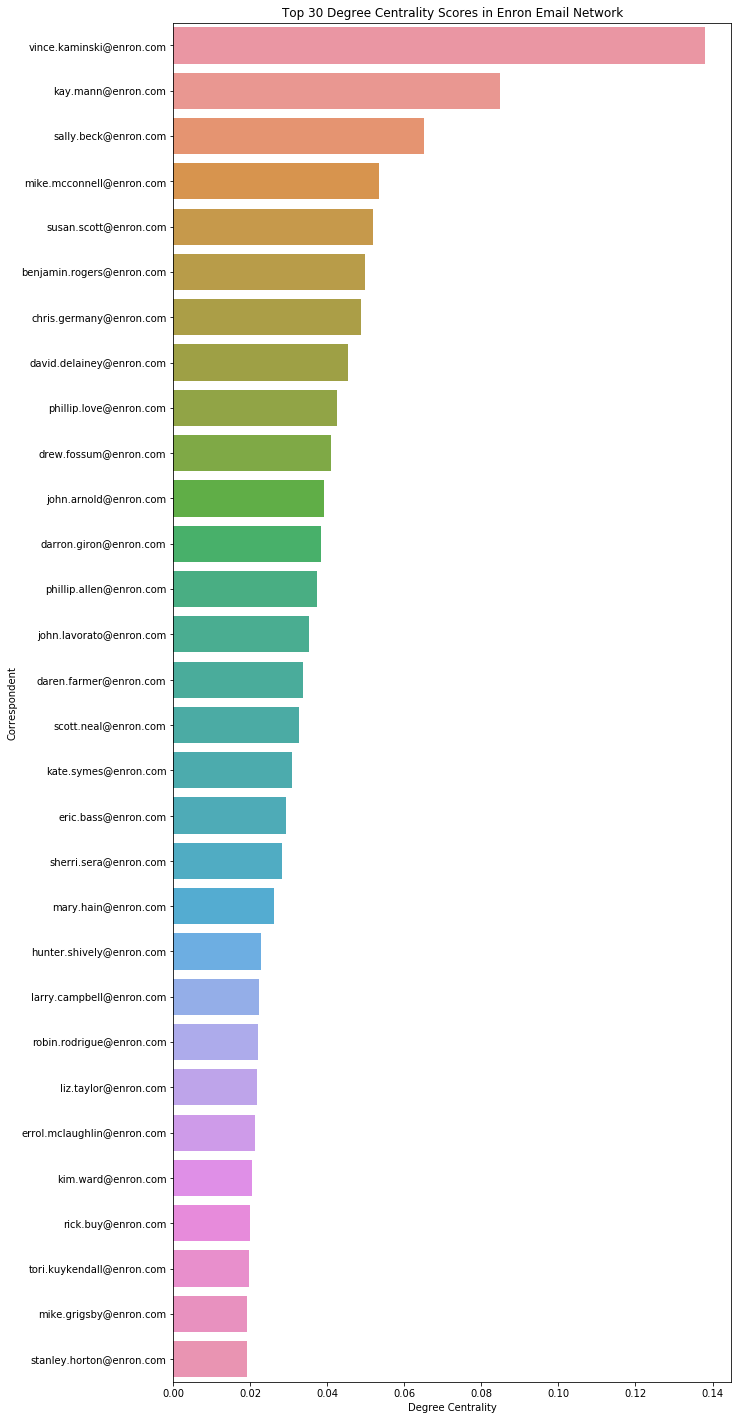

In [30]:
cent = nx.degree_centrality(G)
cent = pd.DataFrame(cent.items())
cent.columns = ['name', 'centrality']
cent = cent.sort_values(by='centrality', ascending=False)

plot_top(cent, 'Degree')

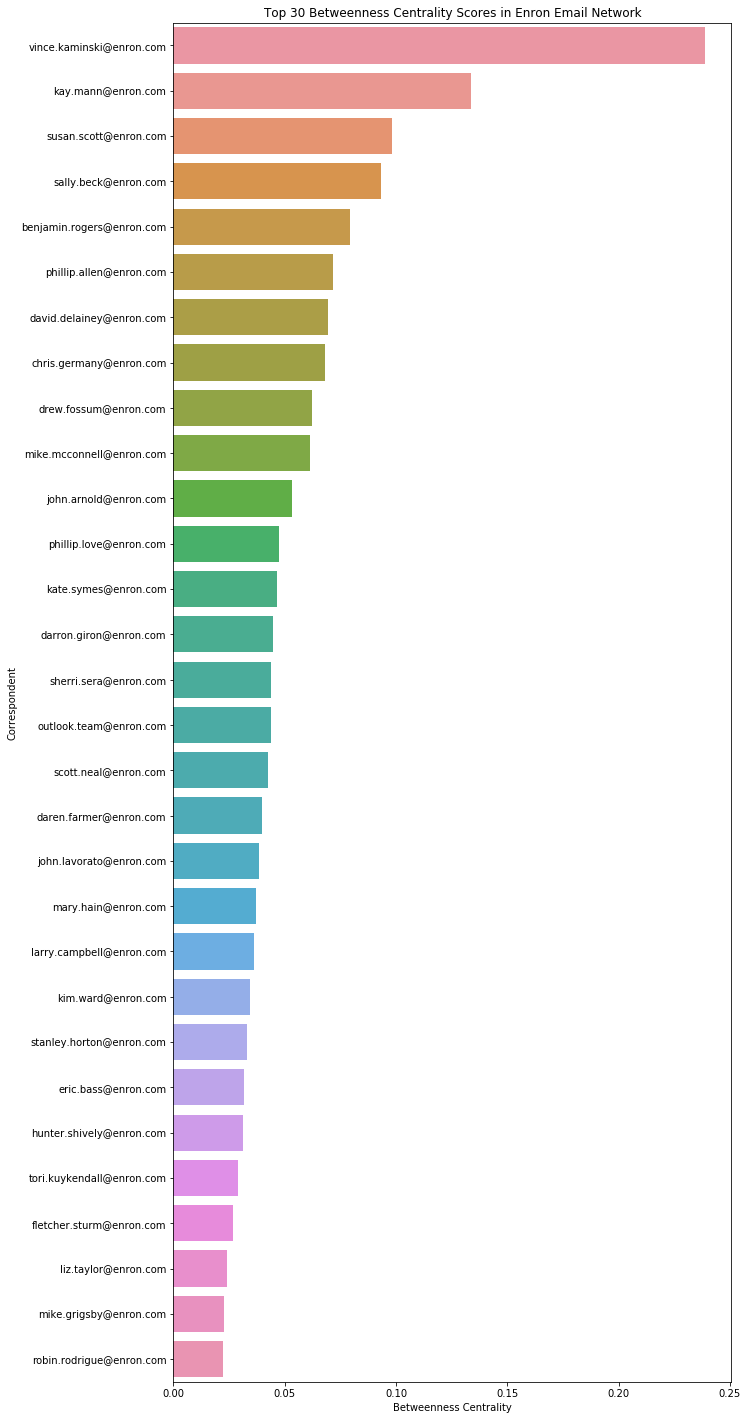

In [31]:
cent = nx.betweenness_centrality(G)
cent = pd.DataFrame(cent.items())
cent.columns = ['name', 'centrality']
cent = cent.sort_values(by='centrality', ascending=False)

plot_top(cent, 'Betweenness')

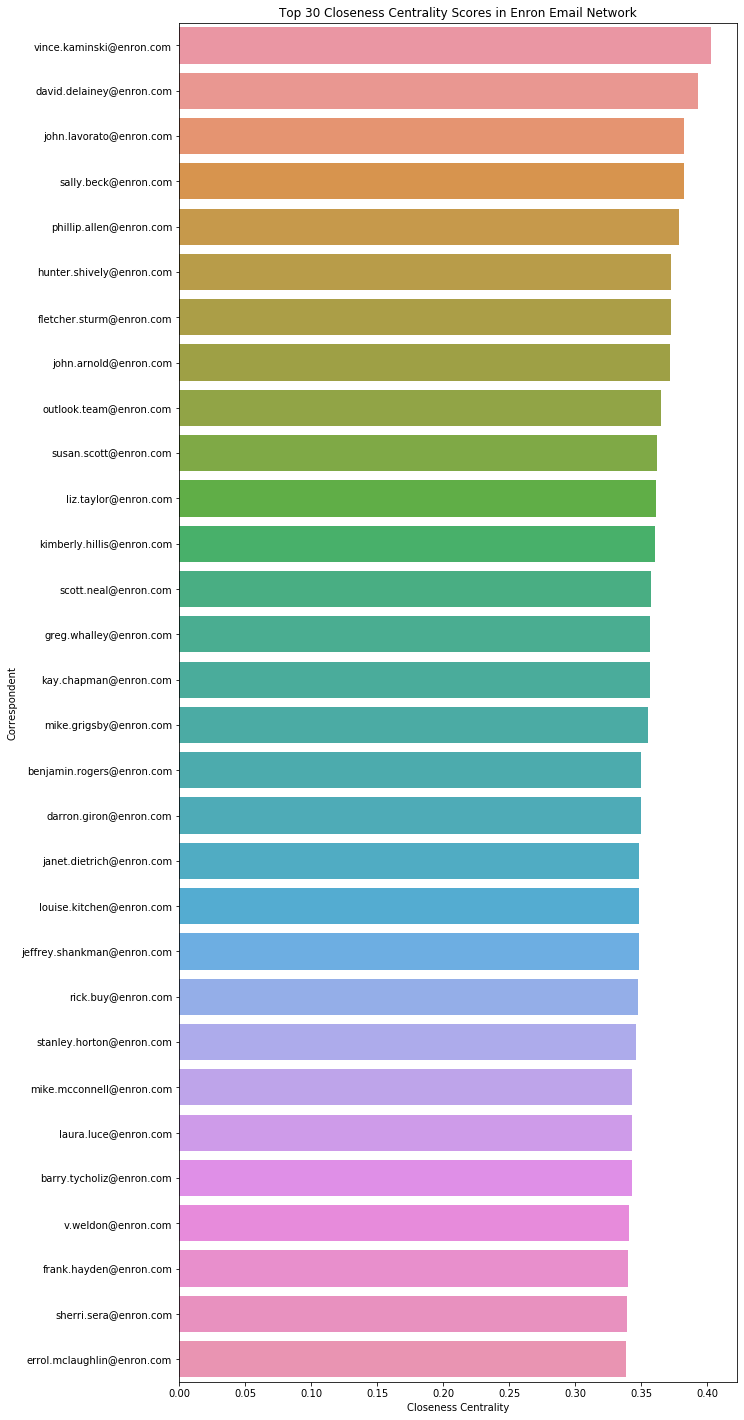

In [32]:
cent = nx.closeness_centrality(G)
cent = pd.DataFrame(cent.items())
cent.columns = ['name', 'centrality']
cent = cent.sort_values(by='centrality', ascending=False)

plot_top(cent, 'Closeness')

In [33]:
from collections import Counter
sorted(Counter(data['from']).items(), key=lambda x: -x[1])[:30]

[('kay.mann@enron.com', 5088),
 ('vince.kaminski@enron.com', 3609),
 ('chris.germany@enron.com', 2621),
 ('eric.bass@enron.com', 1768),
 ('kate.symes@enron.com', 1497),
 ('drew.fossum@enron.com', 1347),
 ('sally.beck@enron.com', 1229),
 ('susan.scott@enron.com', 1189),
 ('phillip.love@enron.com', 1140),
 ('darron.giron@enron.com', 1040),
 ('david.delainey@enron.com', 1028),
 ('benjamin.rogers@enron.com', 996),
 ('daren.farmer@enron.com', 873),
 ('mike.mcconnell@enron.com', 856),
 ('john.arnold@enron.com', 845),
 ('robin.rodrigue@enron.com', 815),
 ('phillip.allen@enron.com', 668),
 ('john.lavorato@enron.com', 550),
 ('scott.neal@enron.com', 528),
 ('mary.hain@enron.com', 498),
 ('judy.hernandez@enron.com', 454),
 ('mark.guzman@enron.com', 358),
 ('mike.grigsby@enron.com', 348),
 ('errol.mclaughlin@enron.com', 306),
 ('hunter.shively@enron.com', 300),
 ('matt.smith@enron.com', 282),
 ('larry.campbell@enron.com', 256),
 ('kim.ward@enron.com', 255),
 ('patrice.mims@enron.com', 243),
 ('ja

In [34]:
sorted(Counter(data['to']).items(), key=lambda x: -x[1])[:30]

[('vkaminski@aol.com', 1061),
 ('suzanne.adams@enron.com', 427),
 ('shirley.crenshaw@enron.com', 301),
 ('nmann@erac.com', 285),
 ('gabriel.monroy@enron.com', 242),
 ('ben.jacoby@enron.com', 239),
 ('evelyn.metoyer@enron.com', 236),
 ('kathleen.carnahan@enron.com', 229),
 ('kerri.thompson@enron.com', 226),
 ('carlos.sole@enron.com', 210),
 ('john.lavorato@enron.com', 200),
 ('bryan.hull@enron.com', 194),
 ('martha.benner@enron.com', 178),
 ('sheila.tweed@enron.com', 175),
 ('jkeffer@kslaw.com', 171),
 ('jason.bass2@compaq.com', 162),
 ('shanna.husser@enron.com', 162),
 ('ccampbell@kslaw.com', 154),
 ('timothy.blanchard@enron.com', 144),
 ('susan.scott@enron.com', 134),
 ('jeffrey.shankman@enron.com', 132),
 ('ina.rangel@enron.com', 132),
 ('roseann.engeldorf@enron.com', 128),
 ('tim.belden@enron.com', 127),
 ('matthew.lenhart@enron.com', 126),
 ('phillip.love@enron.com', 123),
 ('stinson.gibner@enron.com', 121),
 ('david.baumbach@enron.com', 120),
 ('victor.lamadrid@enron.com', 117),
 

Vince Kaminski was the Managing Director for Research at Enron. Kaminski repeatedly raised strong objections to the financial practices of Enron’s Chief Financial Officer, Andrew Fastow, designed to fraudulently conceal the company’s burgeoning debt.

David Delainey, John Lavorato were top Executives, John D. Arnold was a gas trader. Sally Beck was Chief Operating Officer at Enron Networks LLC.

Kay Mann was a head of Legal of Enron company and its node has the biggest number of "from".

## Time distribution

In [100]:
data['only_date'] = data['date'].dt.date
df = data[['from', 'only_date', 'date']].groupby(by=['from', 'only_date']).agg('count')
df.head()

date
from                   only_date       
amelia.alder@enron.com 2001-03-29     1
andrea.ring@enron.com  2000-06-06     1
                       2000-07-11     2
                       2000-07-25     1
                       2000-08-09     1

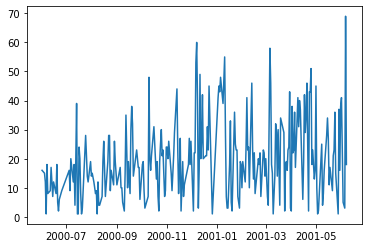

In [113]:
kay_mann = df.T['kay.mann@enron.com'].T.sort_index()
plt.plot(kay_mann);

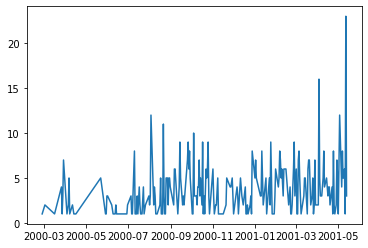

In [115]:
john_arnold = df.T['john.arnold@enron.com'].T.sort_index()
plt.plot(john_arnold);

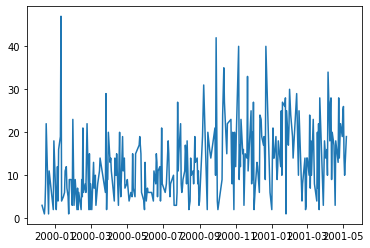

In [114]:
vince_kaminski = df.T['vince.kaminski@enron.com'].T.sort_index()
plt.plot(vince_kaminski);

Head of Legal and gas trader numbers of letters were increased from 2000 to 2001.

It is looks organically.